# Mise en place de l'environement

**Connexion aux fichiers du drive**

In [5]:
#avant de commencer, va dans google drive, Partagés avec moi, clique droit sur Kaggle, ajouter un racourci dans drive, ajouter un racourci
#apres cette manipe la première fois, tout est bon normalement
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import des fichiers de code**

Ces modules contiennent différentes partie du codes. Le code est divisé pour une meilleure lisibilité et pour facilité la modification d'une étape spécifique.

In [2]:
import sys #permet de mettre l'adresse du path python
sys.path.insert(0,'/content/drive/Shareddrives/Kaggle/code') #Changer l'adresse pour francais (fichier de code)

#Ces 4 lignes ne sont pas utiles. Elles ont un but informatif
import nettoyage #fonction de nettoyage sur le df
import categorie #diverse listes de selection sur le df
import score #fonction de score et d affichage sur le df
import fonction #fonction de prediction sur le df

from donnees import * #base de donnees / application de fonction sur la bdd

In [3]:
categorie.m_lv1

['Moyenne candidat en Langue vivante 1 Trimestre 1 Terminale',
 'Moyenne candidat en Langue vivante 1 Trimestre 1 Première',
 'Moyenne candidat en Langue vivante 1 Trimestre 3 Terminale',
 'Moyenne candidat en Langue vivante 1 Trimestre 2 Terminale',
 'Moyenne candidat en Langue vivante 1 Trimestre 2 Première',
 'Moyenne candidat en Langue vivante 1 Trimestre 3 Première',
 'Langue vivante 1']

# Partie de Test de soumission

*affiche_test(X = df_train, y = Y_train, pred = pred)* :
  - X représente le dataframe mère
  - y représente les notes du dataframe (pas des prédictions)
  - pred représente la fonction de prédiction

La fonction créée 5 test en créant 5 df_test/train aléatoires différents depuis le df mère
elle affiche ensuite les RSME des 5 tests et la moyenne des 5 RSME.

Les paramètres de base affichent des indicateurs correspondant aux prénettoyage/nettoyage/prédiction paramétrés dans donnees.py

In [ ]:
affiche_test() #Effectue un test rapide

[8.95916033 6.17615401 5.73191483 5.68597667 5.64471717]
RSME Mean: 6.44


In [ ]:
affiche_test(pred = predit2)

[5.81979381 6.05567915 5.68396868 5.6841886  5.45424147]
RSME Mean: 5.74


In [7]:
affiche_test(pred = predit3)

[23:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[4.68144784 4.81494673 4.66883461 4.29572679 4.25475652]
RSME Mean: 4.54


RSME actuel : 6.58/5.74
Meilleur RSME : 

*affiche_res(X_tr = df_train, X_te = df_test, y = Y_train,pred = pred, Id = Id, export = False)*:
  - X_tr représente le df d'entrainement
  - X_te représente le df de test
  - y représente les scores du df d'entrainement
  - pred représente la fonction de prédiction
  - Id créer la jointure avec les ID
  - export permet d'exporter le résultat en csv a fournir si export = True

La fonction créer un df type de soumission en fonction de la fonction de prédiction et permet de l'exporter.

Les paramètres de bases retournent le df de soumission correspondant aux prénettoyage/nettoyage/prédiction paramétrés dans donnees.py

In [8]:
affiche_res(pred = predit3)

[23:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,id,Points
0,0,75.229324
1,1,114.023796
2,2,71.280846
3,3,109.151634
4,4,25.893686
...,...,...
845,845,68.941917
846,846,92.821289
847,847,114.157784
848,848,100.256950


# Partie Test/Brouillion

**Quelques explications :**

Cette partie est ici afin de ne pas mettre d'erreur dans les différents fichiers .py

Toutes les variables et fonctions contenu dans les fichiers .py sont disponible dans cette environement pour permettre tout test imaginable sans modifier le code.

Exemple :

In [3]:
df_train.head(4)

,Pondération,Méthode de travail,Autonomie,"Engagement, Esprit d'initiative",Capacité à s'investir,Niveau de la classe,Avis sur la capacité à réussir,Note à l'épreuve de Oral de Français (épreuve anticipée),Note à l'épreuve de Ecrit de Français (épreuve anticipée),Moyenne candidat en Mathématiques Trimestre 1 Terminale,Moyenne candidat en Physique/Chimie Trimestre 1 Terminale,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Terminale,Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Terminale,Moyenne candidat en Philosophie Trimestre 1 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 1 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 1 Terminale,Moyenne candidat en Architecture et construction Trimestre 1 Terminale,Moyenne candidat en Energies et environnement Trimestre 1 Terminale,Moyenne candidat en Systemes d''information et numerique Trimestre 1 Terminale,Moyenne candidat en Innovation technologique et eco-concept Trimestre 1 Terminale,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 1 Terminale,Moyenne candidat en Mathématiques Trimestre 2 Terminale,Moyenne candidat en Physique/Chimie Trimestre 2 Terminale,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Terminale,Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Terminale,Moyenne candidat en Philosophie Trimestre 2 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 2 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 2 Terminale,Moyenne candidat en Architecture et construction Trimestre 2 Terminale,Moyenne candidat en Energies et environnement Trimestre 2 Terminale,Moyenne candidat en Systemes d''information et numerique Trimestre 2 Terminale,Moyenne candidat en Innovation technologique et eco-concept Trimestre 2 Terminale,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 2 Terminale,Moyenne candidat en Mathématiques Trimestre 3 Terminale,Moyenne candidat en Physique/Chimie Trimestre 3 Terminale,Moyenne candidat en Philosophie Trimestre 3 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 3 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 3 Terminale,Moyenne candidat en Mathématiques Trimestre 1 Première,Moyenne candidat en Physique/Chimie Trimestre 1 Première,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Première,Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Première,Moyenne candidat en Langue vivante 1 Trimestre 1 Première,Moyenne candidat en Histoire/Géographie Trimestre 1 Première,Moyenne candidat en Français Trimestre 1 Première,Moyenne candidat en Architecture et construction Trimestre 1 Première,Moyenne candidat en Energies et environnement Trimestre 1 Première,Moyenne candidat en Systemes d''information et numerique Trimestre 1 Première,Moyenne candidat en Innovation technologique et eco-concept Trimestre 1 Première,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 1 Première,Moyenne candidat en Mathématiques Trimestre 2 Première,Moyenne candidat en Physique/Chimie Trimestre 2 Première,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Première,Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Première,Moyenne candidat en Langue vivante 1 Trimestre 2 Première,Moyenne candidat en Histoire/Géographie Trimestre 2 Première,Moyenne candidat en Français Trimestre 2 Première,Moyenne candidat en Architecture et construction Trimestre 2 Première,Moyenne candidat en Energies et environnement Trimestre 2 Première,Moyenne candidat en Systemes d''information et numerique Trimestre 2 Première,Moyenne candidat en Innovation technologique et eco-concept Trimestre 2 Première,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 2 Première,Moyenne candidat en Mathématiques Trimestre 3 Première,Moyenne candidat en Physique/Chimie Trimestre 3 Première,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 3 Première,Moyenne candidat en Sciences d

In [8]:
moyennes_g(df_train,liste_matiere[0],liste_moy_mat[0])

,Pondération,Méthode de travail,Autonomie,"Engagement, Esprit d'initiative",Capacité à s'investir,Niveau de la classe,Avis sur la capacité à réussir,Note à l'épreuve de Oral de Français (épreuve anticipée),Note à l'épreuve de Ecrit de Français (épreuve anticipée),Moyenne candidat en Mathématiques Trimestre 1 Terminale,Moyenne candidat en Physique/Chimie Trimestre 1 Terminale,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Terminale,Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Terminale,Moyenne candidat en Philosophie Trimestre 1 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 1 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 1 Terminale,Moyenne candidat en Architecture et construction Trimestre 1 Terminale,Moyenne candidat en Energies et environnement Trimestre 1 Terminale,Moyenne candidat en Systemes d''information et numerique Trimestre 1 Terminale,Moyenne candidat en Innovation technologique et eco-concept Trimestre 1 Terminale,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 1 Terminale,Moyenne candidat en Mathématiques Trimestre 2 Terminale,Moyenne candidat en Physique/Chimie Trimestre 2 Terminale,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Terminale,Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Terminale,Moyenne candidat en Philosophie Trimestre 2 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 2 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 2 Terminale,Moyenne candidat en Architecture et construction Trimestre 2 Terminale,Moyenne candidat en Energies et environnement Trimestre 2 Terminale,Moyenne candidat en Systemes d''information et numerique Trimestre 2 Terminale,Moyenne candidat en Innovation technologique et eco-concept Trimestre 2 Terminale,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 2 Terminale,Moyenne candidat en Mathématiques Trimestre 3 Terminale,Moyenne candidat en Physique/Chimie Trimestre 3 Terminale,Moyenne candidat en Philosophie Trimestre 3 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 3 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 3 Terminale,Moyenne candidat en Mathématiques Trimestre 1 Première,Moyenne candidat en Physique/Chimie Trimestre 1 Première,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Première,Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Première,Moyenne candidat en Langue vivante 1 Trimestre 1 Première,Moyenne candidat en Histoire/Géographie Trimestre 1 Première,Moyenne candidat en Français Trimestre 1 Première,Moyenne candidat en Architecture et construction Trimestre 1 Première,Moyenne candidat en Energies et environnement Trimestre 1 Première,Moyenne candidat en Systemes d''information et numerique Trimestre 1 Première,Moyenne candidat en Innovation technologique et eco-concept Trimestre 1 Première,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 1 Première,Moyenne candidat en Mathématiques Trimestre 2 Première,Moyenne candidat en Physique/Chimie Trimestre 2 Première,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Première,Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Première,Moyenne candidat en Langue vivante 1 Trimestre 2 Première,Moyenne candidat en Histoire/Géographie Trimestre 2 Première,Moyenne candidat en Français Trimestre 2 Première,Moyenne candidat en Architecture et construction Trimestre 2 Première,Moyenne candidat en Energies et environnement Trimestre 2 Première,Moyenne candidat en Systemes d''information et numerique Trimestre 2 Première,Moyenne candidat en Innovation technologique et eco-concept Trimestre 2 Première,Moyenne candidat en Enseignements Technologiques Transversaux Trimestre 2 Première,Moyenne candidat en Mathématiques Trimestre 3 Première,Moyenne candidat en Physique/Chimie Trimestre 3 Première,Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 3 Première,Moyenne candidat en Sciences d

In [7]:
for i in range(len(liste_matiere)):
  df_test = moyennes_g(df_test,liste_matiere[i],liste_moy_mat[i])
  df_test = df_test.drop(df_test[list(set(liste_moy_mat[i])- set([liste_matiere[i]]))],axis = 1)
df_test[df_test[liste_matiere]>25] = 0
df_test[df_test[liste_matiere]<0] = 0

KeyError: ignored

In [4]:
add_moyenne_liste(df_test,liste_matiere,liste_moy_mat)

KeyError: ignored

In [11]:
matiere = ['Mathématiques','Systemes d''information et numerique','Energies et environnement',"Sciences de l'ingénieur","Enseignements Technologiques Transversaux","Français","Sciences de la Vie et de la Terre","Physique/Chimie","Architecture et construction","Innovation technologique et eco-concept","Histoire/Géographie","Langue vivante 1"]

In [10]:
len(matiere)

12

Attention cependant, les dataframes sont déja prétraité/traité avec le traitement paramétré dans donnees.py

Pour avoir les données initiales :
```
# df_train = pd.read_csv('/content/drive/MyDrive/Kaggle/data/train.csv', sep=';', decimal = ',')
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle/data/test.csv', sep=';', decimal = ',')
```
Attention également lors de l'attribution d'une nouvelle valeur à une variable existante dans un fichier .py



**Brouillon**

In [ ]:
len(moyenne)

130

# Modification du code

**donnees.py**

Le fichier donnees.py est le seul à avoir accès aux donner et à exécuter des fonctions, il joue entre autre le rôle d'un fichier main.py

Les autres fichiers .py sont des modules prévu pour interagir avec le fichier donnees.py chacun à un objectif particulier.

Le fichier est diviser en plusieurs parties :
  - la partie import : importation des autres fichiers .py et exclusivement eux.
  - la partie pré-traitement : c'est un premier traitement de données nécessaire avant tout choix de traitement. En principe, elle n'est pas amenée à être modifiée. Elle hérite toutes ses fonctions de nettoyage.py
  - la partie traitement : c'est le traitement effectué sur le dataframe. Elle hérite toutes ses fonctions de nettoyage.py
  - la partie prédiction : c'est le choix de la fonction de prédiction. Elle hérite toutes ses fonctions de fonction.py
  - la partie observation : elle permet à l'utilisateur d'avoir un retour des tests de prédictions effectués.

**nettoyage.py/categorie.py**

nettoyage.py contient des fonctions visant a nettoyer le dataframe. En principe, elles prennent un dataframe en argument renvoient un dataframe modifiée.

categorie.py contient diverses listes qui peuvent être utilisées pour traiter un dataframe.

**fonction.py**

fonction.py contient les fonctions de prédiction. Une foncton de prédiction prend en argument X_tr (type df_train), X_te (type df_test) et y (type Y_train), elle renvoit une prédiction y_pred.

**score.py**

score.py contient des fonction qui interviennent ni pour le traitement, ni pour la prédiction. Le fichier permet d'afficher les tests effectués.

**mettre à jour le code**

une fois les tests effectué sur le notebook (partie traitement ou prédiction), il est intéressant de modifier les fichier .py

  1. modifier le code :

  double clique sur l'emplacement du fichier dans votre drive chargé sur colab.

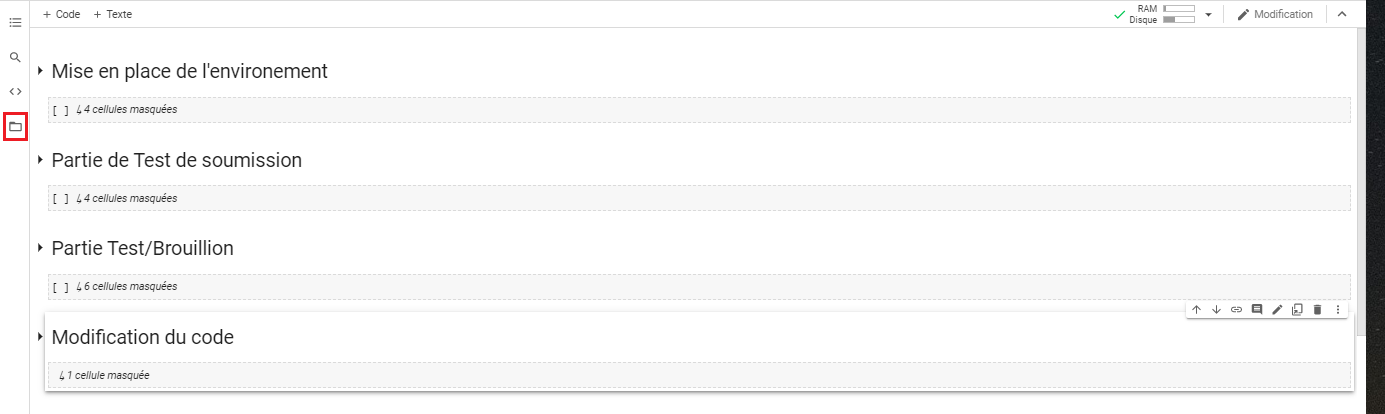

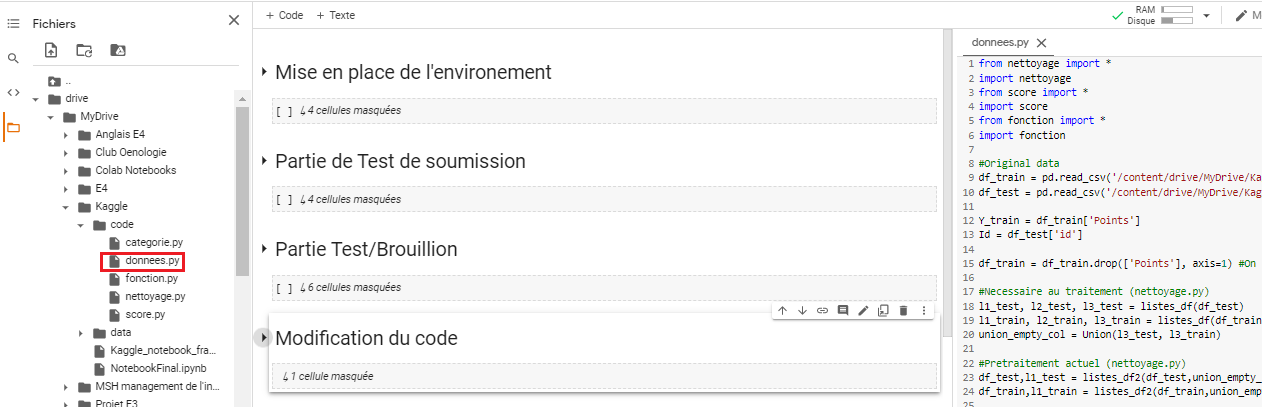

  Un éditeur de texte s'ouvre alors. Vous pouvez effectuer la modification

  2. actualiser le code dans le notebook
  Une fois le fichier modifier, il faut le sauvegarder (Ctrl+S), colab peut également sauvegarder le fichier automatiquement.
  Après avoir été modifié, le fichier doit être recharger dans le notebook, pour cela, il faut redémarer l'environement d'exécussion

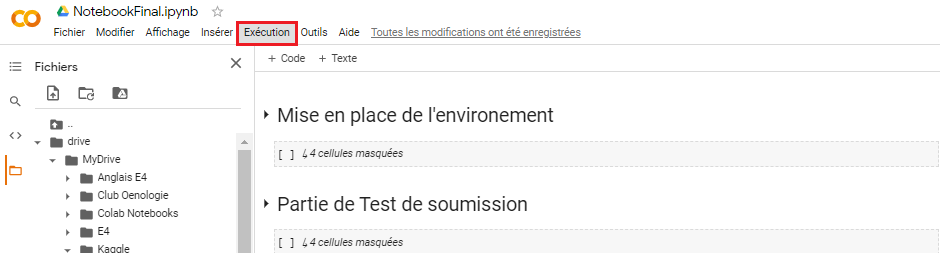

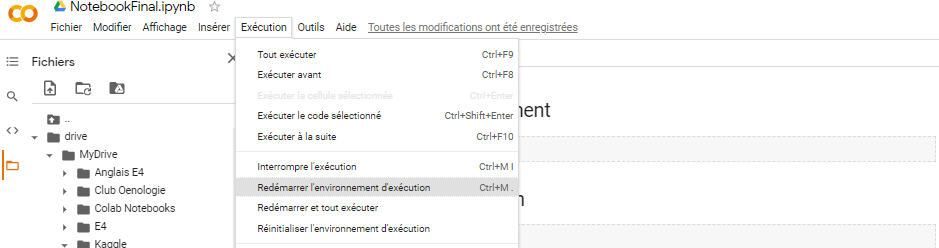

  3. il suffit maintenant de ré-exécuter les formules d'import des fichiers pour que la modification soit prises en compte.


Modifier le code peut être problématique si les lignes ajoutées font des erreurs, il est conseiller de vérifier le bon fonctionnement de ligne de code dans la partie de test.

# Graphs

Cette partie est réservée au tracé de graph.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show>

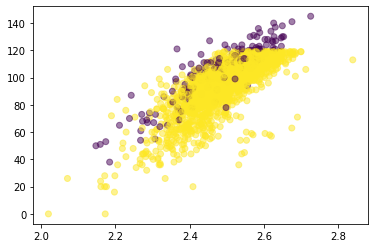

In [ ]:
plt.scatter(np.log(df_train['Moyenne']), Y_train, c = df_train["Bac_scientific"], alpha = 0.5)
plt.show